## BeautifulSoup Demo


In [2]:
## Installation of libraris
!pip install bs4

In [2]:
## Import libraries

import requests
from bs4 import BeautifulSoup
import csv

# List of maximum verses for each chapter
max_slokas = [
    47, 72, 43, 42, 29, 47, 30, 28, 34, 42, 55, 20, 35, 27, 20, 24, 28, 78
]

# Function to scrape Bhagavad Gita verses and save in CSV
def scrape_bhagavad_gita(chapter):
    base_url = "https://www.gitasupersite.iitk.ac.in/srimad"

    # Get the max verses for the specified chapter
    max_verse = max_slokas[chapter - 1]  # Get the max verses for the current chapter

    # Open CSV file to write the data
    with open(f'./Week_2/Day_5/Files/chapter_{chapter}_translation.csv', 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Verse Number', 'Translation']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write header row
        writer.writeheader()

        # Loop through each verse in the chapter
        for verse in range(1, max_verse + 1):
            params = {
                'language': 'dv',
                'field_chapter_value': chapter,
                'field_nsutra_value': verse,
                'etsiva': '1',
                'choose': '1'
            }

            # Send GET request to fetch the page content
            response = requests.get(base_url, params=params)

            if response.status_code != 200:
                print(f"Failed to retrieve Chapter {chapter}, Verse {verse}.")
                continue

            # Parse the content with BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')

            # Find the translation content (looking for the div with class 'views-field views-field-field-etsiva')
            verse_div = soup.find('div', class_='views-field views-field-field-etsiva')

            if verse_div:
                # Extract the translation text
                verse_text = verse_div.get_text(separator="\n", strip=True)

                # Remove unwanted text like "English Translation By Swami Sivananda"
                if "English Translation By Swami Sivananda" in verse_text:
                    verse_text = verse_text.split("English Translation By Swami Sivananda")[1]

                # Remove the verse number at the start (e.g., "1.10")
                verse_text = ' '.join(verse_text.split()[1:])

                # Remove any double quotes from the translation
                verse_text = verse_text.replace('"', '')

                # Remove the verse number at the end (e.g., "।।1.10।।")
                if "।।" in verse_text:
                    verse_text = verse_text.split("।।")[0]

                # Write the verse number and translation to the CSV file
                writer.writerow({'Verse Number': verse, 'Translation': verse_text.strip()})
                print(f"Chapter {chapter}, Verse {verse} saved successfully.")
            else:
                print(f"No verse content found for Chapter {chapter}, Verse {verse}.")

    print(f"Scraping for Chapter {chapter} completed.")

# Ask the user which chapter to scrape
try:
    chapter_number = int(input("Enter the chapter number you want to scrape (1-18): "))
    if chapter_number < 1 or chapter_number > 18:
        print("Invalid chapter number! Please enter a number between 1 and 18.")
    else:
        # Start scraping the specified chapter
        scrape_bhagavad_gita(chapter_number)
except ValueError:
    print("Invalid input! Please enter a valid number.")


Chapter 6, Verse 1 saved successfully.
Chapter 6, Verse 2 saved successfully.
Chapter 6, Verse 3 saved successfully.
Chapter 6, Verse 4 saved successfully.
Chapter 6, Verse 5 saved successfully.
Chapter 6, Verse 6 saved successfully.
Chapter 6, Verse 7 saved successfully.
Chapter 6, Verse 8 saved successfully.
Chapter 6, Verse 9 saved successfully.
Chapter 6, Verse 10 saved successfully.
Chapter 6, Verse 11 saved successfully.
Chapter 6, Verse 12 saved successfully.
Chapter 6, Verse 13 saved successfully.
Chapter 6, Verse 14 saved successfully.
Chapter 6, Verse 15 saved successfully.
Chapter 6, Verse 16 saved successfully.
Chapter 6, Verse 17 saved successfully.
Chapter 6, Verse 18 saved successfully.
Chapter 6, Verse 19 saved successfully.
Chapter 6, Verse 20 saved successfully.
Chapter 6, Verse 21 saved successfully.
Chapter 6, Verse 22 saved successfully.
Chapter 6, Verse 23 saved successfully.
Chapter 6, Verse 24 saved successfully.
Chapter 6, Verse 25 saved successfully.
Chapter 6

## Crawl4AI Demo

In [12]:
%%capture
!pip install -U "crawl4ai[all]"
!playwright install

In [5]:
import crawl4ai

ModuleNotFoundError: No module named 'crawl4ai'

In [14]:
import nest_asyncio
nest_asyncio.apply()

In [25]:
import json
import asyncio
from crawl4ai import AsyncWebCrawler, CrawlerRunConfig, CacheMode
from crawl4ai.extraction_strategy import JsonCssExtractionStrategy

async def extract_content_wrappers(year):
    # Construct the URL with the geoname-id and year
    base_url = "https://www.drikpanchang.com/vrats/ekadashidates.html"
    geoname_id = "1261481"
    full_url = f"{base_url}?geoname-id={geoname_id}&year={year}"
    print(f"Scraping URL: {full_url}")

    # Define the extraction schema for `dpPageContentWrapper`
    schema = {
        "name": "Page Content",
        "baseSelector": "div.dpPageContentWrapper",
        "fields": [
            {
                "name": "section_title",
                "selector": "h2.dpContentTitle",
                "type": "text"
            },
            {
                "name": "image",
                "selector": "figure.dpFigure img",
                "type": "nested",
                "fields": [
                    {
                        "name": "image_url",
                        "type": "attribute",
                        "attribute": "src"
                    },
                    {
                        "name": "alt_text",
                        "type": "attribute",
                        "attribute": "alt"
                    }
                ]
            },
            {
                "name": "content_paragraphs",
                "selector": "p.dpContent",
                "type": "list",
                "fields": [
                    {
                        "name": "content",
                        "type": "text"
                    }
                ]
            }
        ]
    }

    extraction_strategy = JsonCssExtractionStrategy(schema, verbose=True)

    config = CrawlerRunConfig(
        cache_mode=CacheMode.BYPASS,
        extraction_strategy=extraction_strategy,
    )

    result = None
    async with AsyncWebCrawler(verbose=True) as crawler:
        result = await crawler.arun(
            url=full_url,
            config=config
        )

        if not result.success:
            print("Crawl failed:", result.error_message)
            return

        # Parse the extracted JSON
        data = json.loads(result.extracted_content)
        print(f"Extracted {len(data)} entries")
        print(json.dumps(data, indent=2) if data else "No data found")

    return result

# Specify the year to scrape
year_to_scrape = 2825
res = asyncio.run(extract_content_wrappers(year_to_scrape))


Scraping URL: https://www.drikpanchang.com/vrats/ekadashidates.html?geoname-id=1261481&year=2825
[INIT].... → Crawl4AI 0.4.247
[FETCH]... ↓ https://www.drikpanchang.com/vrats/ekadashidates.h... | Status: True | Time: 6.87s
[SCRAPE].. ◆ Processed https://www.drikpanchang.com/vrats/ekadashidates.h... | Time: 218ms
[EXTRACT]. ■ Completed for https://www.drikpanchang.com/vrats/ekadashidates.h... | Time: 0.09048280699994393s
[COMPLETE] ● https://www.drikpanchang.com/vrats/ekadashidates.h... | Status: True | Total: 7.23s
Extracted 2 entries
[
  {
    "section_title": "2825 Ekadashi Fasting Days",
    "image": {
      "image_url": "/images/gods/dashavatara/lord-vishnu/goddess-ekadashi/xgoddess_ekadashi.jpg.pagespeed.ic.8mF_8ZctG4.webp",
      "alt_text": "Goddess Ekadashi"
    },
    "content_paragraphs": [
      {
        "content": "Ekadashi fasting is observed on every 11thTithi in Hindu calendar. There are two Ekadashi fasting in a month, one during Shukla Paksha and another during Krishn

CrawlResult(url='https://www.drikpanchang.com/vrats/ekadashidates.html?geoname-id=1261481&year=2825', html='<!DOCTYPE html><html lang="en"><head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<meta name="theme-color" content="#9F2800">\n<title>2825 Ekadashi | Ekadasi fasting days for New Delhi, NCT, India</title>\n<meta name="description" content="List of Ekadashi fasting days in the year 2825 for New Delhi, NCT, India. Ekadashi is also spelled as Ekadasi.">\n<meta name="keywords" content="Ekadashi, Ekadasi, Ekadashi Fasting, Ekadasi Fasting, Ekadashi Vrats, Ekadasi Vrats, Ekadashi Days, Ekadasi Days, Ekadashi New Delhi, Ekadashi 2825, Ekadashi Dates New Delhi, Ekadashi Dates 2825, Ekadasi New Delhi, Ekadasi 2825">\n<link rel="search" type="application/opensearchdescription+xml" title="Drikpanchang" href="/assets/opensearch.xml">\n<meta property="fb:app_id" content="9020965791275198">\n<meta property="og:url" content="http://www.drikpa
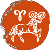
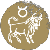
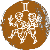
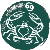
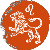
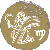
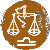
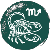
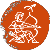
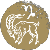
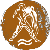
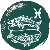
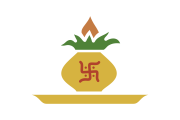
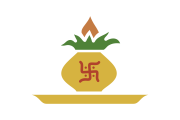
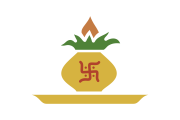
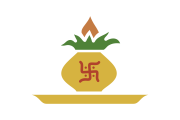
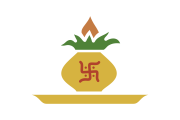
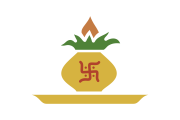
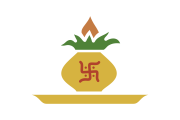
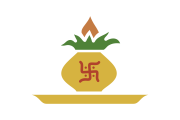
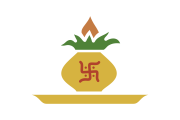
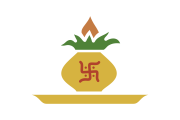
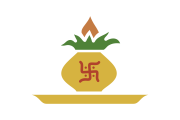
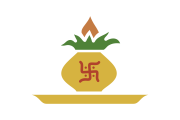
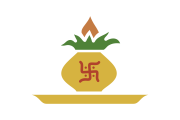
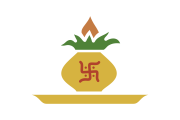
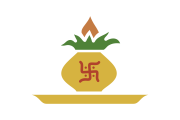
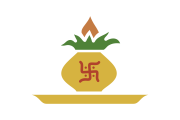
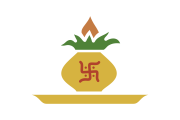
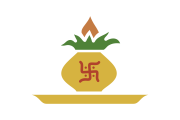
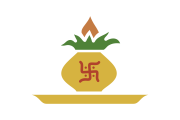
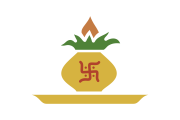
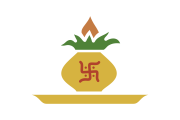
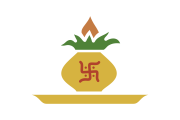
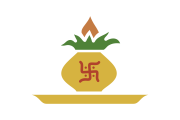
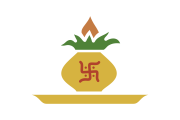
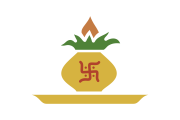
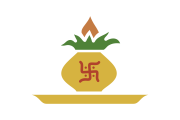
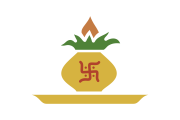
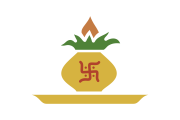
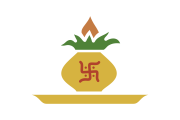
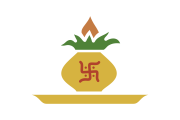

In [26]:
res

In [28]:
data = json.loads(res.extracted_content)

In [29]:
data

[{'section_title': '2825 Ekadashi Fasting Days',
  'image': {'image_url': '/images/gods/dashavatara/lord-vishnu/goddess-ekadashi/xgoddess_ekadashi.jpg.pagespeed.ic.8mF_8ZctG4.webp',
   'alt_text': 'Goddess Ekadashi'},
  'content_paragraphs': [{'content': 'Ekadashi fasting is observed on every 11thTithi in Hindu calendar. There are two Ekadashi fasting in a month, one during Shukla Paksha and another during Krishna Paksha. Devotees ofLord Vishnuobserve Ekadashi fasting to seek His blessings.'},
   {'content': 'Ekadashi fasting spans for three days. Devotees take single meal in the afternoon a day before fasting day to make sure there is no residual food in the stomach on next day. Devotees keep strict fast on Ekadashi day and break the fast on next day only after sunrise. Eating of all type of grains and cereals is prohibited during Ekadashi fasting.'},
   {'content': 'Devotees can choose to observe fasting without water, with only water, with only fruits, with one time latex food accor